# Bank Marketing

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution.
The classification goal is to predict if the client will subscribe a term deposit (variable y).

# Description of Data:

# Bank client data:
Age (numeric)

Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)

Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

Default: has credit in default? (categorical: 'no', 'yes', 'unknown')

Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')

Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')


# Details regarding last contact of the current campaign:
Contact: contact communication type (categorical: 'cellular','telephone')

Month: last contact month (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

Duration: last contact duration, in seconds (numeric).

Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

Previous: number of contacts performed before this campaign and for this client (numeric)

Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

# Economic Index attributes

Emp.var.rate: employment variation rate  (numeric)

Cons.price.idx: consumer price index  (numeric)

Cons.conf.idx: consumer confidence index (numeric)

Euribor3m: euribor 3 month rate (numeric)

Nr.employed: number of employees (numeric)


# Output variable (desired target):
y - has the client subscribed to the term deposit? (binary: 'yes', 'no')


In [1]:
#importing the necessary libraries


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.feature_selection import RFE
#import xgboost as xgb
#from xgboost import XGBClassifier
#from imblearn.over_sampling import SMOTE
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [2]:
bank_df = pd.read_csv('bank-additional-full.csv', sep = ';')
bank_df.head()



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# checking the shape of the dataframe

bank_df.shape

(41188, 21)

In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

# We decided to seperate the data into 3 parts
   - Client specific
   - Marketing specific
   - Economic index specific

# Client specific data processing

In [5]:

client_df = bank_df.iloc[: , 0:7]
client_df.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


# Checking the spread of each categorical columns

# Univarite Analysis

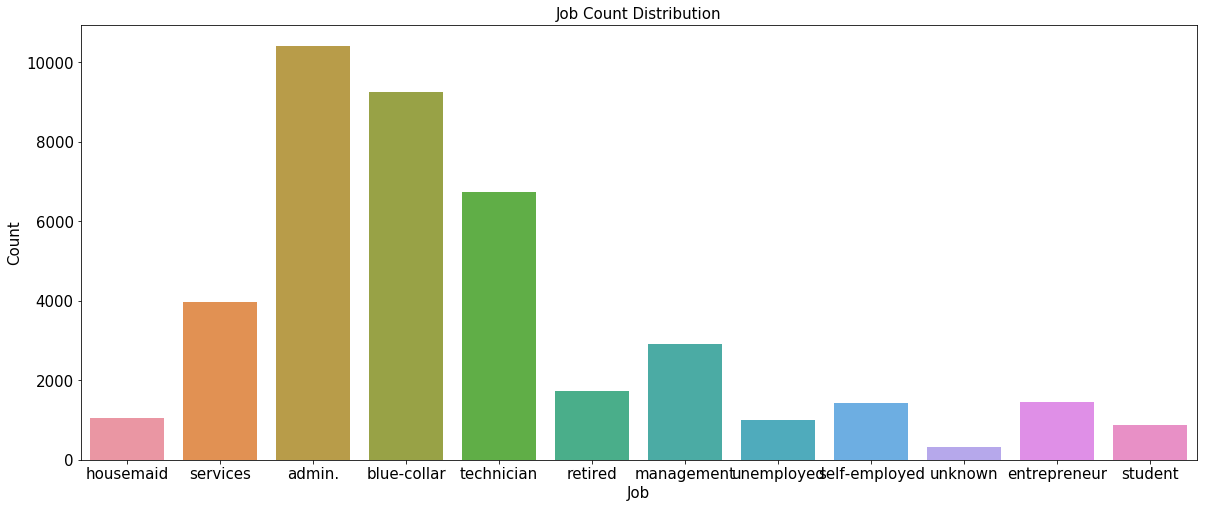

In [6]:

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = client_df)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)


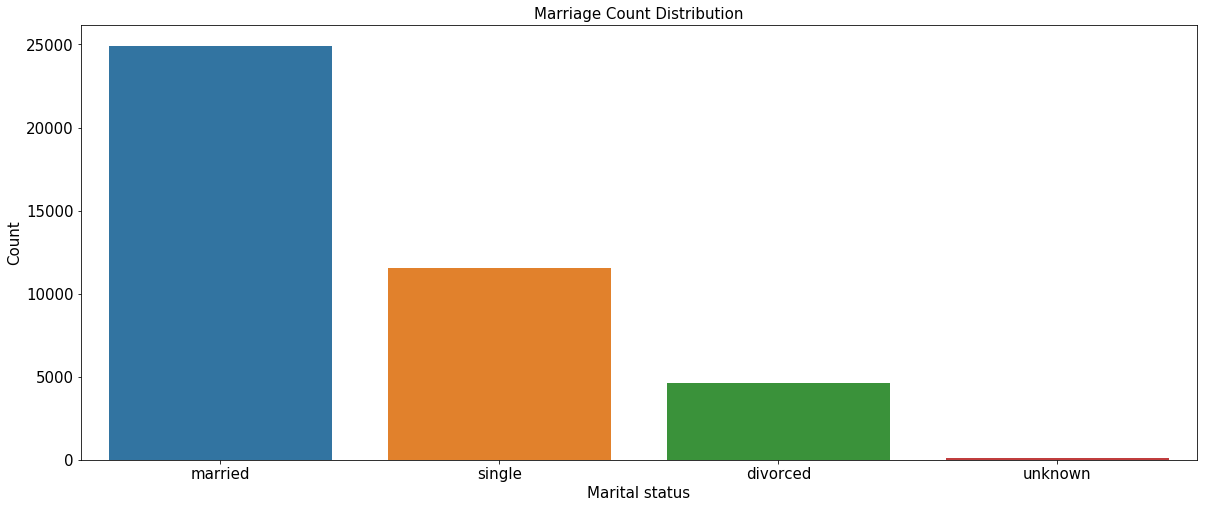

In [7]:

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'marital', data = client_df)
ax.set_xlabel('Marital status', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marriage Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)


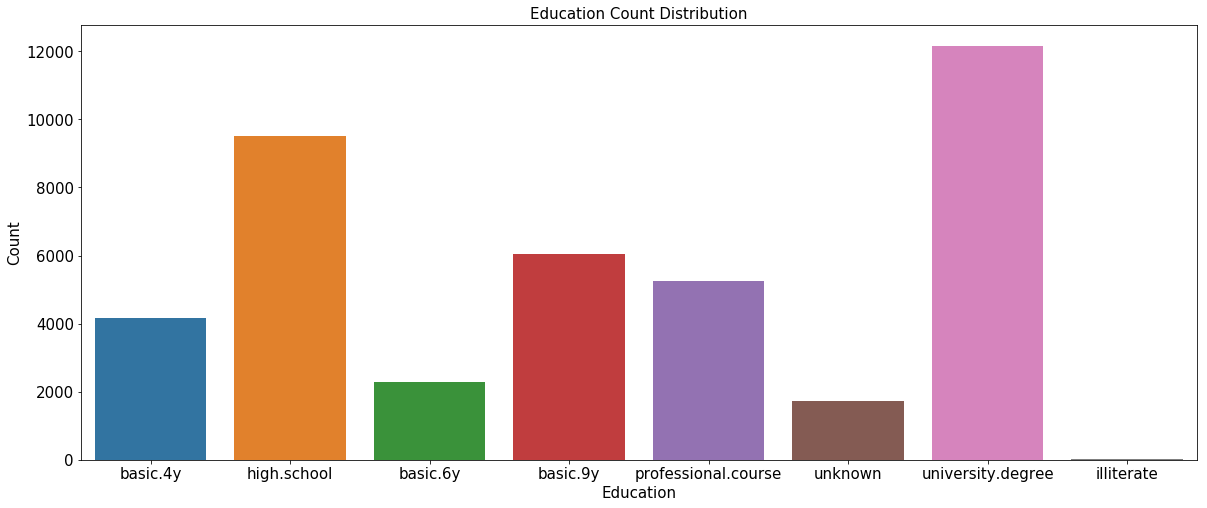

In [8]:

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'education', data = client_df)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)


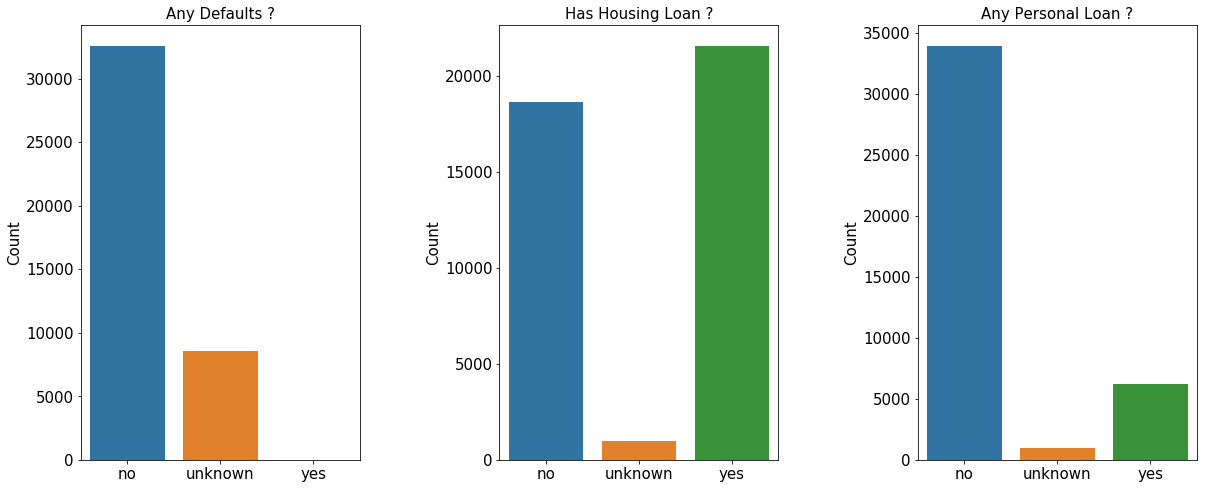

In [9]:
# Is credit in default ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = client_df, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Any Defaults ?', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Has housing loan ?
sns.countplot(x = 'housing', data = client_df, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Has Housing Loan ?', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Has Personal loan ?
sns.countplot(x = 'loan', data = client_df, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Any Personal Loan ?', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)


# Checking the distribution of Age

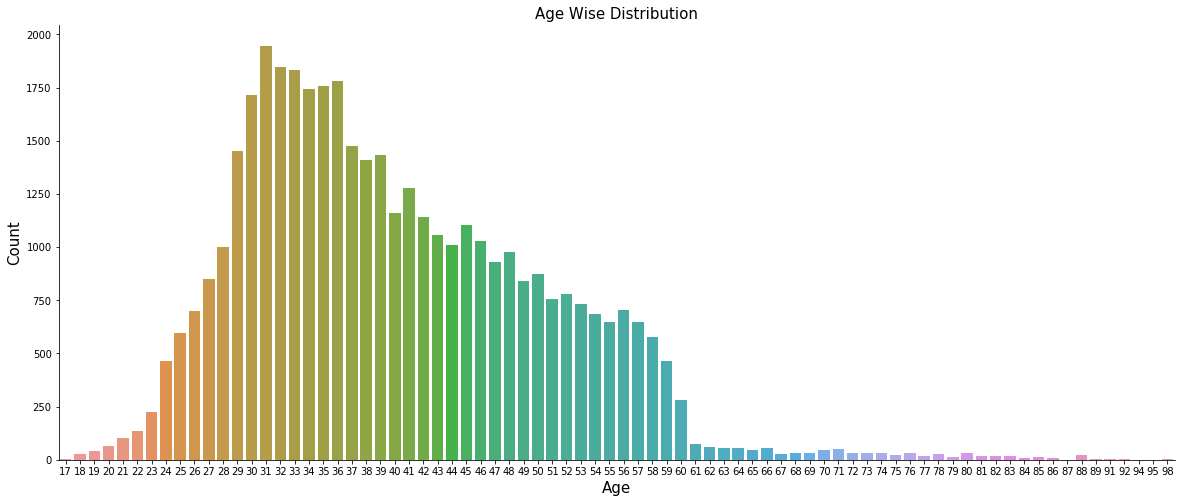

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = client_df)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Wise Distribution', fontsize=15)
sns.despine()


# Checking the outliers in Age

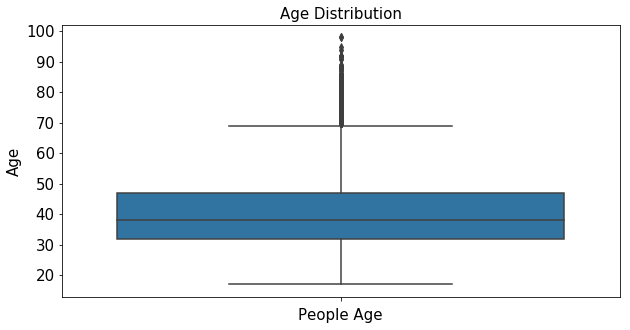

In [11]:
fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 5))
sns.boxplot(x = 'age', data = client_df, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)


In [12]:
# Calculate the outliers using:

  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
 

In [13]:
Q1=client_df['age'].quantile(q = 0.25)
Q2=client_df['age'].quantile(q = 0.50)
Q3=client_df['age'].quantile(q = 0.75)
Q4=client_df['age'].quantile(q = 1.00)                        

IQR= Q3-Q1

print('1st Quartile: ', Q1)
print('2nd Quartile: ', Q2)
print('3rd Quartile: ', Q3)
print('4th Quartile: ', Q4)
print('IQR: ',IQR)


print('Ages above: ', Q3 + 1.5*(IQR), 'are outliers')
print('Ages below: ', Q1 - 1.5*(IQR), 'are outliers')



1st Quartile:  32.0
2nd Quartile:  38.0
3rd Quartile:  47.0
4th Quartile:  98.0
IQR:  15.0
Ages above:  69.5 are outliers
Ages below:  9.5 are outliers


In [14]:
# checking other details of age
client_df['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

# Age data has quite dispersion , we will divide it into buckets

In [15]:
# functions to create bucketing in age

def age(df):
    df.loc[df['age'] <= 32, 'age'] = 1
    df.loc[(df['age'] > 32) & (df['age'] <= 47), 'age'] = 2
    df.loc[(df['age'] > 47) & (df['age'] <= 70), 'age'] = 3
    df.loc[(df['age'] > 70), 'age']=4
           
    return df

age(client_df);

# Checking the categorical data

In [16]:
# converting categorical columns to numerical values
"""
client_df['job'].replace(['housemaid' , 'services' , 'admin.' , 'blue-collar' , 'technician', 'retired' , 'management', 'unemployed', 'self-employed', 'unknown' , 'entrepreneur', 'student'] , [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)


client_df['education'].replace(['basic.4y' , 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown' , 'university.degree' , 'illiterate'], [1, 2, 3, 4, 5, 6, 7, 8], inplace=True)

client_df['marital'].replace(['married', 'single', 'divorced', 'unknown'], [1, 2, 3, 4], inplace=True)

client_df['default'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)

client_df['housing'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)

client_df['loan'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)
"""


"\nclient_df['job'].replace(['housemaid' , 'services' , 'admin.' , 'blue-collar' , 'technician', 'retired' , 'management', 'unemployed', 'self-employed', 'unknown' , 'entrepreneur', 'student'] , [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)\n\n\nclient_df['education'].replace(['basic.4y' , 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown' , 'university.degree' , 'illiterate'], [1, 2, 3, 4, 5, 6, 7, 8], inplace=True)\n\nclient_df['marital'].replace(['married', 'single', 'divorced', 'unknown'], [1, 2, 3, 4], inplace=True)\n\nclient_df['default'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)\n\nclient_df['housing'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)\n\nclient_df['loan'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)\n"

# One hot encoding for all categorical values

In [17]:
client_df=pd.get_dummies(client_df)
client_df.head()

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,3,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,3,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
2,2,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,1,0,0
3,2,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,3,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1


# Marketing Data Analysis

In [18]:
# Creating seperate datasets for marketing related data
marketing_df = bank_df.iloc[: , 7:15]
marketing_df.head()


,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,telephone,may,mon,261,1,999,0,nonexistent
1,telephone,may,mon,149,1,999,0,nonexistent
2,telephone,may,mon,226,1,999,0,nonexistent
3,telephone,may,mon,151,1,999,0,nonexistent
4,telephone,may,mon,307,1,999,0,nonexistent


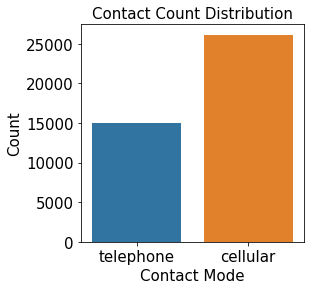

In [19]:

fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
sns.countplot(x = 'contact', data = marketing_df)
ax.set_xlabel('Contact Mode', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Contact Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)


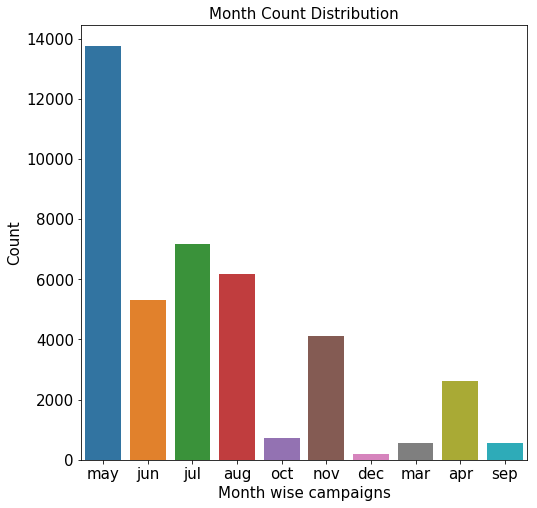

In [20]:

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
sns.countplot(x = 'month', data = marketing_df)
ax.set_xlabel('Month wise campaigns', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Month Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)


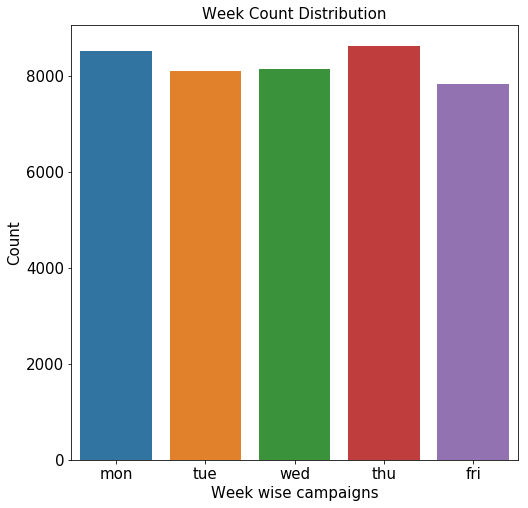

In [21]:

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
sns.countplot(x = 'day_of_week', data = marketing_df)
ax.set_xlabel('Week wise campaigns', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Week Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)


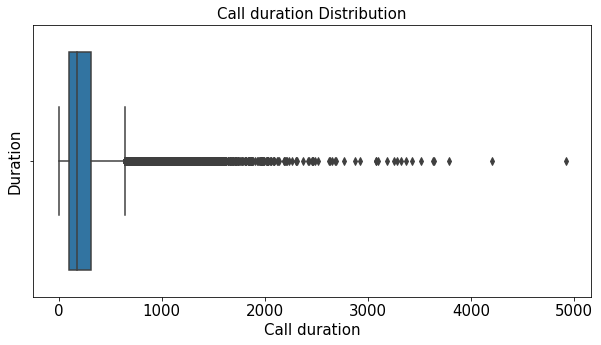

In [22]:
# checking the duration column

fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 5))
sns.boxplot(x = 'duration', data = marketing_df, orient = 'h', ax = ax1)
ax1.set_xlabel('Call duration', fontsize=15)
ax1.set_ylabel('Duration', fontsize=15)
ax1.set_title('Call duration Distribution', fontsize=15)
ax1.tick_params(labelsize=15)


In [23]:
# finding the outliers

Q1=marketing_df['duration'].quantile(q = 0.25)
Q2=marketing_df['duration'].quantile(q = 0.50)
Q3=marketing_df['duration'].quantile(q = 0.75)
Q4=marketing_df['duration'].quantile(q = 1.00)                        

IQR= Q3-Q1

print('1st Quartile: ', Q1)
print('2nd Quartile: ', Q2)
print('3rd Quartile: ', Q3)
print('4th Quartile: ', Q4)
print('IQR: ',IQR)


print('Duration above: ', Q3 + 1.5*(IQR), 'are outliers')
print('Duration below: ', Q1 - 1.5*(IQR), 'are outliers')



1st Quartile:  102.0
2nd Quartile:  180.0
3rd Quartile:  319.0
4th Quartile:  4918.0
IQR:  217.0
Duration above:  644.5 are outliers
Duration below:  -223.5 are outliers


# Dividing the duration into buckets

In [24]:
def duration(df):

    df.loc[df['duration'] <= 102, 'duration'] = 1
    df.loc[(df['duration'] > 102) & (df['duration'] <= 180)  , 'duration']    = 2
    df.loc[(df['duration'] > 180) & (df['duration'] <= 319)  , 'duration']   = 3
    df.loc[(df['duration'] > 319) & (df['duration'] <= 644.5), 'duration'] = 4
    df.loc[df['duration']  > 644.5, 'duration'] = 5

    return df

duration(marketing_df)

,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,telephone,may,mon,3,1,999,0,nonexistent
1,telephone,may,mon,2,1,999,0,nonexistent
2,telephone,may,mon,3,1,999,0,nonexistent
3,telephone,may,mon,2,1,999,0,nonexistent
4,telephone,may,mon,3,1,999,0,nonexistent
5,telephone,may,mon,3,1,999,0,nonexistent
6,telephone,may,mon,2,1,999,0,nonexistent
7,telephone,may,mon,3,1,999,0,nonexistent
8,telephone,may,mon,4,1,999,0,nonexistent
9,telephone,may,mon,1,1,999,0,nonexistent


# convert month columns to numerical data

In [25]:

d_mons = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 
    'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10,
    'nov':11, 'dec':12}

marketing_df.month=marketing_df.month.map(d_mons)


In [26]:
marketing_df.head()

,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,telephone,5,mon,3,1,999,0,nonexistent
1,telephone,5,mon,2,1,999,0,nonexistent
2,telephone,5,mon,3,1,999,0,nonexistent
3,telephone,5,mon,2,1,999,0,nonexistent
4,telephone,5,mon,3,1,999,0,nonexistent


# convert week columns to numerical data

In [27]:
d_week = {'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5, 
    'sat':6, 'sun':7}

marketing_df.day_of_week=marketing_df.day_of_week.map(d_week)


In [28]:
marketing_df.head()

,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,telephone,5,1,3,1,999,0,nonexistent
1,telephone,5,1,2,1,999,0,nonexistent
2,telephone,5,1,3,1,999,0,nonexistent
3,telephone,5,1,2,1,999,0,nonexistent
4,telephone,5,1,3,1,999,0,nonexistent


# converting contact,poutcome into numerical values

In [29]:


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
marketing_df['contact'] = le.fit_transform(marketing_df['contact'])
marketing_df['poutcome'] = le.fit_transform(marketing_df['poutcome'])


In [30]:
# converting datatype to int

marketing_df['contact'] =marketing_df['contact'].astype(str).astype(int)
marketing_df['month'] =marketing_df['month'].astype(str).astype(int)
marketing_df['day_of_week'] =marketing_df['day_of_week'].astype(str).astype(int)
marketing_df['poutcome'] =marketing_df['poutcome'].astype(str).astype(int)



In [31]:
marketing_df.head()

,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,1,5,1,3,1,999,0,1
1,1,5,1,2,1,999,0,1
2,1,5,1,3,1,999,0,1
3,1,5,1,2,1,999,0,1
4,1,5,1,3,1,999,0,1


In [32]:
corr=marketing_df.corr()
corr

,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
contact,1.000000,-0.324315,0.019583,-0.028498,0.077368,0.117970,-0.212848,0.118744
month,-0.324315,1.000000,-0.006959,-0.044550,-0.030635,-0.079556,0.063754,0.028950
day_of_week,0.019583,-0.006959,1.000000,0.001086,0.015098,0.006765,0.004013,-0.012788
duration,-0.028498,-0.044550,0.001086,1.000000,-0.116664,-0.075945,0.045537,0.041657
campaign,0.077368,-0.030635,0.015098,-0.116664,1.000000,0.052584,-0.079141,0.032586
pdays,0.117970,-0.079556,0.006765,-0.075945,0.052584,1.000000,-0.587514,-0.475619
previous,-0.212848,0.063754,0.004013,0.045537,-0.079141,-0.587514,1.000000,-0.313110
poutcome,0.118744,0.028950,-0.012788,0.041657,0.032586,-0.475619,-0.313110,1.000000


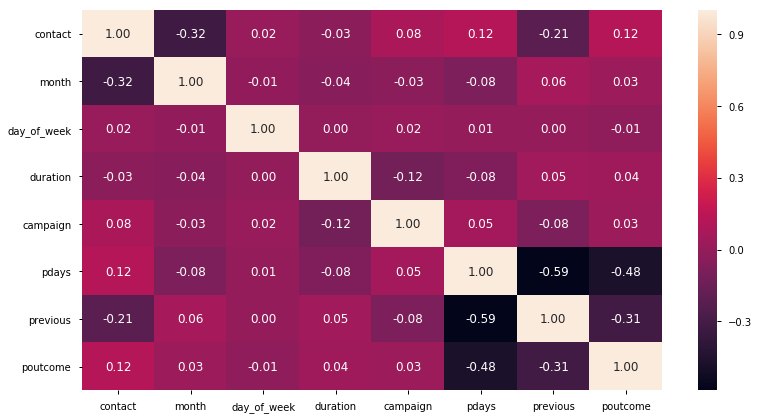

In [33]:
sns.set_context("notebook",font_scale = 1.0, rc = {"lines.linewidth":2.5})
plt.figure(figsize = (13,7))
a = sns.heatmap(corr, annot = True, fmt = ".2f")

# Economic Index data

In [34]:
# Slicing market economic index data 
index_df = bank_df.iloc[: , 15:21]
index_df.head()


,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.1,93.994,-36.4,4.857,5191.0,no
1,1.1,93.994,-36.4,4.857,5191.0,no
2,1.1,93.994,-36.4,4.857,5191.0,no
3,1.1,93.994,-36.4,4.857,5191.0,no
4,1.1,93.994,-36.4,4.857,5191.0,no


In [35]:
idx_corr=index_df.corr()
idx_corr

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
emp.var.rate,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,0.906970,0.522034,0.100513,0.945154,1.000000


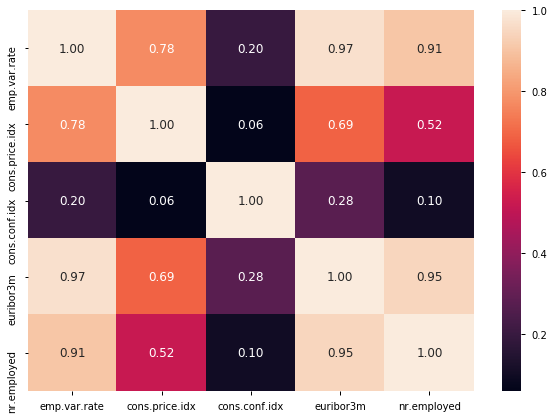

In [36]:
sns.set_context("notebook",font_scale = 1.0, rc = {"lines.linewidth":2.5})
plt.figure(figsize = (10,7))
a = sns.heatmap(idx_corr, annot = True, fmt = ".2f")

# Combining 3 dataframes

In [37]:

bank_final_df= pd.concat([client_df, marketing_df, index_df], axis = 1)
bank_final_df.shape

(41188, 48)

In [38]:
bank_final_df.head()

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,0,0,0,1,0,0,0,0,0,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,3,0,0,0,0,0,0,0,1,0,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,2,0,0,0,0,0,0,0,1,0,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,2,1,0,0,0,0,0,0,0,0,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,3,0,0,0,0,0,0,0,1,0,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


# Seperating X and Y

In [39]:
bank_final_df['y'].replace(['yes', 'no'],[1,0 ], inplace=True)

In [40]:
X=bank_final_df
y=bank_final_df['y']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bank_final_df, y, test_size = 0.30, random_state = 101)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
#k_fold = KFold(n_splits=10, shuffle=True, random_state=0)


In [42]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[10978     0]
 [    0  1379]]
100.0
